In [112]:
#Setup the google drive
import os
#from google.colab import drive
#drive.mount('/content/gdrive')
#os.listdir('/content/gdrive/MyDrive')
#Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
import tensorflow as tf
tf.random.set_seed(2)
#Keras/TensorFlow
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, Input, Concatenate, Dense, Add
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
#Keras image processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
#Seaborn
import seaborn as sns #

In [113]:
# can replace wit full trainPath and TestPath
curPath = os.getcwd()
trainPath = curPath + '/TRAIN'
testPath = curPath + '/TEST'


trainIDs = next(os.walk(trainPath))[1]  # IDs, refers to 6-digit identifier (ie 000000)
train_x = []
train_y = []

for id in trainIDs:
    imPath = trainPath + '/' + id
    imNames = next(os.walk(imPath))[2]  # this will break if there are not at least 3 images in each subdir
    train_x.append([tf.keras.utils.load_img(imPath + '/' + imNames[0], target_size=(256,256)), \
                    tf.keras.utils.load_img(imPath + '/' + imNames[2], target_size=(256,256))])
    train_y.append(tf.keras.utils.load_img(imPath + '/' + imNames[1], target_size=(256,256)))

train_x = np.array(train_x)
train_y = np.array(train_y)

testIDs = next(os.walk(testPath))[1]  # IDs, refers to 6-digit identifier (ie 000000)
test_x = []
test_y = []

for id in testIDs:
    imPath = testPath + '/' + id
    imNames = next(os.walk(imPath))[2]  # this will break if there are not at least 3 images in each subdir
    test_x.append([tf.keras.utils.load_img(imPath + '/' + imNames[0], target_size=(256,256)), \
                    tf.keras.utils.load_img(imPath + '/' + imNames[2], target_size=(256,256))])
    test_y.append(tf.keras.utils.load_img(imPath + '/' + imNames[1], target_size=(256,256)))

test_x = np.array(test_x)
test_y = np.array(test_y)

(514, 256, 256)


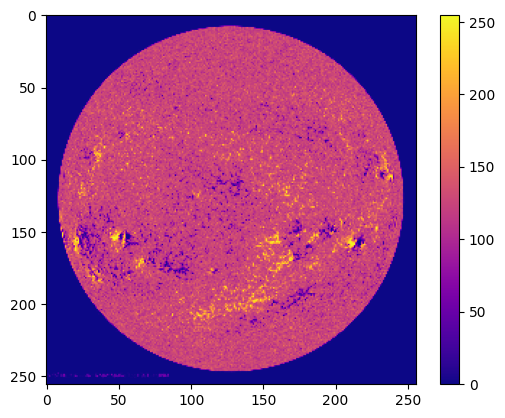

In [114]:
# x shape (bs, 2)
# y shape (bs)
# images are three channels, but only one is needed since grayscale
fig, ax = plt.subplots(1)

pos = ax.imshow(train_y[0][:,:,0], cmap='plasma')
fig.colorbar(pos, ax=ax)
print(train_y[:,:,:,0].shape)

In [ ]:
# kernel = (4,4)
# pool_size = (2,2)
# filters = 32
# loss_rate = 1e-4
# epochs = 2
# batch_size = 128
# val_split = 0.15
# hyperparameters = [kernel,pool_size]

# class customModel(tf.keras.Model):
#     def __init__(self, hyperparameters):
#         super().__init__()
#         self.inp1 = Input(shape=(1024,1024,1))
#         self.inp2 = Input(shape=(1024,1024,1))
#         self.cat = Concatenate(axis=1)
#         self.conv1 = Conv2D(filters, kernel, padding = 'same', activation='relu')
#         self.pool1 = MaxPooling2D(pool_size=pool_size)
#         self.conv2 = Conv2D(filters,kernel, padding = 'same',activation='relu')
#         self.pool2 = MaxPooling2D(pool_size=pool_size)
#         self.tconv1 = Conv2DTranspose(filters, kernel, strides=pool_size, padding = 'same') #Upsampling to get back to 1024x1024
#         self.tconv2 = Conv2DTranspose(1, kernel, strides=pool_size, padding = 'same')
#     def call(self, inputs):
#         x1 = inputs[0]
#         x2 = inputs[1]
#         x = self.cat([x1,x2])
#         x = self.conv1(x)
#         x = self.pool1(x)
#         x = self.conv2(x)
#         x = self.pool2(x)
#         x = self.tconv1(x)
#         return self.tconv2(x)


# model = customModel('dum')
# model.compile(optimizer=Adam(loss_rate),loss='mean_squared_error',metrics=['accuracy'])
# checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='min')
# history=model.fit([train_x[:,0], train_x[:,1]], train_y, epochs=epochs, batch_size=batch_size, callbacks=checkpoint)

Epoch 1/2


/home/abedel/miniconda3/envs/ners590/lib/python3.12/site-packages/keras/src/layers/layer.py:1383: UserWarning: Layer 'custom_model_8' looks like it has unbuilt state, but Keras is not able to trace the layer `call()` in order to build it automatically. Possible causes:
1. The `call()` method of your layer may be crashing. Try to `__call__()` the layer eagerly on some test input first to see if it works. E.g. `x = np.random.random((3, 4)); y = layer(x)`
2. If the `call()` method is correct, then you may need to implement the `def build(self, input_shape)` method on your layer. It should create all variables used by the layer (e.g. by calling `layer.build()` on all its children layers).
Exception encountered: ''got an unexpected keyword argument 'dtype'''
  warnings.warn(
/home/abedel/miniconda3/envs/ners590/lib/python3.12/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'custom_model_8', however the layer does not have a `build()` method implemente

TypeError: Exception encountered when calling customModel.call().

[1mgot an unexpected keyword argument 'dtype'[0m

Arguments received by customModel.call():
  • inputs=('tf.Tensor(shape=(None, 1024, 1024, 3), dtype=uint8)', 'tf.Tensor(shape=(None, 1024, 1024, 3), dtype=uint8)')

In [115]:
kernel = (4,4)
pool_size = (2,2)
filters = [16, 8]
loss_rate = 1e-4
epochs = 500
batch_size = 128
val_split = 0.15

x1 = Input(shape=(256,256,1))
x2 = Input(shape=(256,256,1))
x = Add()([x1,x2])
x = Conv2D(filters[0], kernel, padding = 'same', activation='relu')(x)
x = MaxPooling2D(pool_size=pool_size)(x)
x = Conv2D(filters[0],kernel, padding = 'same',activation='relu')(x)
x = Dense(filters[0], activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)    # editted this line to change dimension sizes
x = Conv2DTranspose(filters[0], kernel, strides=pool_size, padding = 'same')(x) #Upsampling to get back to 1024x1024
x = Conv2DTranspose(1, kernel, strides=pool_size, padding = 'same')(x)

# # Alternative to MSE loss
# def SSIMLoss(y_true, y_pred):
#   return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))


model = Model(inputs=[x1,x2], outputs=x)
model.compile(optimizer=Adam(loss_rate),loss='MAE')
model.summary()
checkpoint = ModelCheckpoint('best_model_no_dense.keras', monitor='val_loss', save_best_only=True, mode='min')
history=model.fit([train_x[:,0,:,:,0], train_x[:,1,:,:,0]], train_y[:,:,:,0], epochs=epochs, verbose=True, batch_size=batch_size, validation_split = val_split, callbacks=checkpoint)

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24      │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_25      │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 256, 256,  │          0 │ input_layer_24[0… │
│                     │ 1)                │            │ input_layer_25[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 256, 256,  │        272 │ add_12[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_24    │ (None, 128, 128,  │          0 │ conv2d_24[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 128, 128,  │      4,112 │ max_pooling2d_24… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 128, 128,  │        272 │ conv2d_25[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_25    │ (None, 64, 64,    │          0 │ dense_11[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_24 │ (None, 128, 128,  │      4,112 │ max_pooling2d_25… │
│ (Conv2DTranspose)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_25 │ (None, 256, 256,  │        257 │ conv2d_transpose… │
│ (Conv2DTranspose)   │ 1)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 9,025 (35.25 KB)

 Trainable params: 9,025 (35.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500


/home/abedel/.conda/envs/tfgpu/lib/python3.11/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_440', 'keras_tensor_441']. Received: the structure of inputs=('*', '*')
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 457ms/step - loss: 84.9847 - val_loss: 84.2281
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 83.9086 - val_loss: 83.0814
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 82.7232 - val_loss: 81.8350
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 81.4768 - val_loss: 80.4654
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 80.0803 - val_loss: 78.9424
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 78.5242 - val_loss: 77.2332
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 76.7424 - val_loss: 75.3047
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 74.8022 - val_loss: 73.1315
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 72.5818 - val_loss: 70.6986
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 70.0956 - val_loss: 67.9605
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 67.2915 - val_loss: 64.8478
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 64.1

Epoch 69/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 13.3858 - val_loss: 13.3654
Epoch 70/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 13.3518 - val_loss: 13.3324
Epoch 71/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 13.3178 - val_loss: 13.3009
Epoch 72/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 13.2883 - val_loss: 13.2711
Epoch 73/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 13.2590 - val_loss: 13.2429
Epoch 74/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 13.2312 - val_loss: 13.2163
Epoch 75/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 13.2036 - val_loss: 13.1912
Epoch 76/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 13.1801 - val_loss: 13.1673
Epoch 77/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 13.1564 - val_loss: 13.1445
Epoch 78/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 13.1338 - val_loss: 13.1226
Epoch 79/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 13.1121 - val_loss: 13.1016
Epoch 80/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.3268 - val_loss: 12.3226
Epoch 137/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 12.3166 - val_loss: 12.3123
Epoch 138/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 12.3064 - val_loss: 12.3022
Epoch 139/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.2954 - val_loss: 12.2921
Epoch 140/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 12.2863 - val_loss: 12.2821
Epoch 141/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12.2764 - val_loss: 12.2722
Epoch 142/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 12.2665 - val_loss: 12.2624
Epoch 143/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 12.2568 - val_loss: 12.2527
Epoch 144/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 12.2471 - val_loss: 12.2430
Epoch 145/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.2375 - val_loss: 12.2334
Epoch 146/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 12.2280 - val_loss: 12.2239
Epoch 147/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.7746 - val_loss: 11.7732
Epoch 204/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.7684 - val_loss: 11.7677
Epoch 205/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.7635 - val_loss: 11.7623
Epoch 206/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 11.7581 - val_loss: 11.7569
Epoch 207/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.7521 - val_loss: 11.7516
Epoch 208/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.7467 - val_loss: 11.7463
Epoch 209/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.7421 - val_loss: 11.7411
Epoch 210/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 11.7369 - val_loss: 11.7360
Epoch 211/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 11.7317 - val_loss: 11.7309
Epoch 212/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.7266 - val_loss: 11.7258
Epoch 213/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.7216 - val_loss: 11.7209
Epoch 214/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 11.4987 - val_loss: 11.5003
Epoch 271/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.4957 - val_loss: 11.4973
Epoch 272/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.4926 - val_loss: 11.4942
Epoch 273/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 11.4895 - val_loss: 11.4912
Epoch 274/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.4865 - val_loss: 11.4882
Epoch 275/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 11.4835 - val_loss: 11.4852
Epoch 276/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.4805 - val_loss: 11.4822
Epoch 277/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 11.4775 - val_loss: 11.4792
Epoch 278/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.4746 - val_loss: 11.4763
Epoch 279/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.4716 - val_loss: 11.4733
Epoch 280/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.4687 - val_loss: 11.4704
Epoch 281/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 11.3268 - val_loss: 11.3290
Epoch 338/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 11.3245 - val_loss: 11.3266
Epoch 339/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 11.3220 - val_loss: 11.3243
Epoch 340/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 11.3196 - val_loss: 11.3219
Epoch 341/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 11.3173 - val_loss: 11.3196
Epoch 342/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 11.3126 - val_loss: 11.3173
Epoch 343/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.3126 - val_loss: 11.3150
Epoch 344/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 11.3102 - val_loss: 11.3127
Epoch 345/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 11.3079 - val_loss: 11.3104
Epoch 346/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 11.3056 - val_loss: 11.3081
Epoch 347/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 11.3033 - val_loss: 11.3058
Epoch 348/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 11.1871 - val_loss: 11.1909
Epoch 405/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - loss: 11.1854 - val_loss: 11.1892
Epoch 406/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 578ms/step - loss: 11.1837 - val_loss: 11.1876
Epoch 407/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - loss: 11.1821 - val_loss: 11.1859
Epoch 408/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - loss: 11.1804 - val_loss: 11.1842
Epoch 409/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 409ms/step - loss: 11.1788 - val_loss: 11.1826
Epoch 410/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 11.1771 - val_loss: 11.1810
Epoch 411/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - loss: 11.1755 - val_loss: 11.1794
Epoch 412/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 11.1739 - val_loss: 11.1777
Epoch 413/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 11.1723 - val_loss: 11.1761
Epoch 414/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 11.1707 - val_loss: 11.1746
Epoch 415/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.0918 - val_loss: 11.0960
Epoch 472/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.0906 - val_loss: 11.0948
Epoch 473/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.0868 - val_loss: 11.0935
Epoch 474/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.0880 - val_loss: 11.0923
Epoch 475/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 11.0868 - val_loss: 11.0910
Epoch 476/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.0856 - val_loss: 11.0898
Epoch 477/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 11.0843 - val_loss: 11.0886
Epoch 478/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 11.0831 - val_loss: 11.0873
Epoch 479/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 11.0819 - val_loss: 11.0861
Epoch 480/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 11.0806 - val_loss: 11.0849
Epoch 481/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 11.0794 - val_loss: 11.0837
Epoch 482/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms

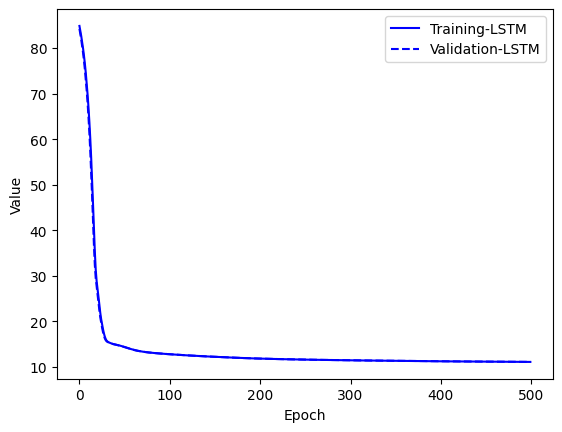

In [116]:
mae = history.history['loss']
vmae = history.history['val_loss']
plt.figure()
plt.plot(mae, label='Training-LSTM',color='blue',linestyle='-')
plt.plot(vmae, label='Validation-LSTM',color='blue',linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

In [117]:
model_best = load_model('best_model.keras')
best_eval = model_best.evaluate([test_x[:,0,:,:,0], test_x[:,0,:,:,0]], test_y[:,:,:,0],verbose=2)
new_images = model_best.predict([test_x[:,0,:,:,0], test_x[:,0,:,:,0]])

5/5 - 0s - 96ms/step - loss: 10.9637
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


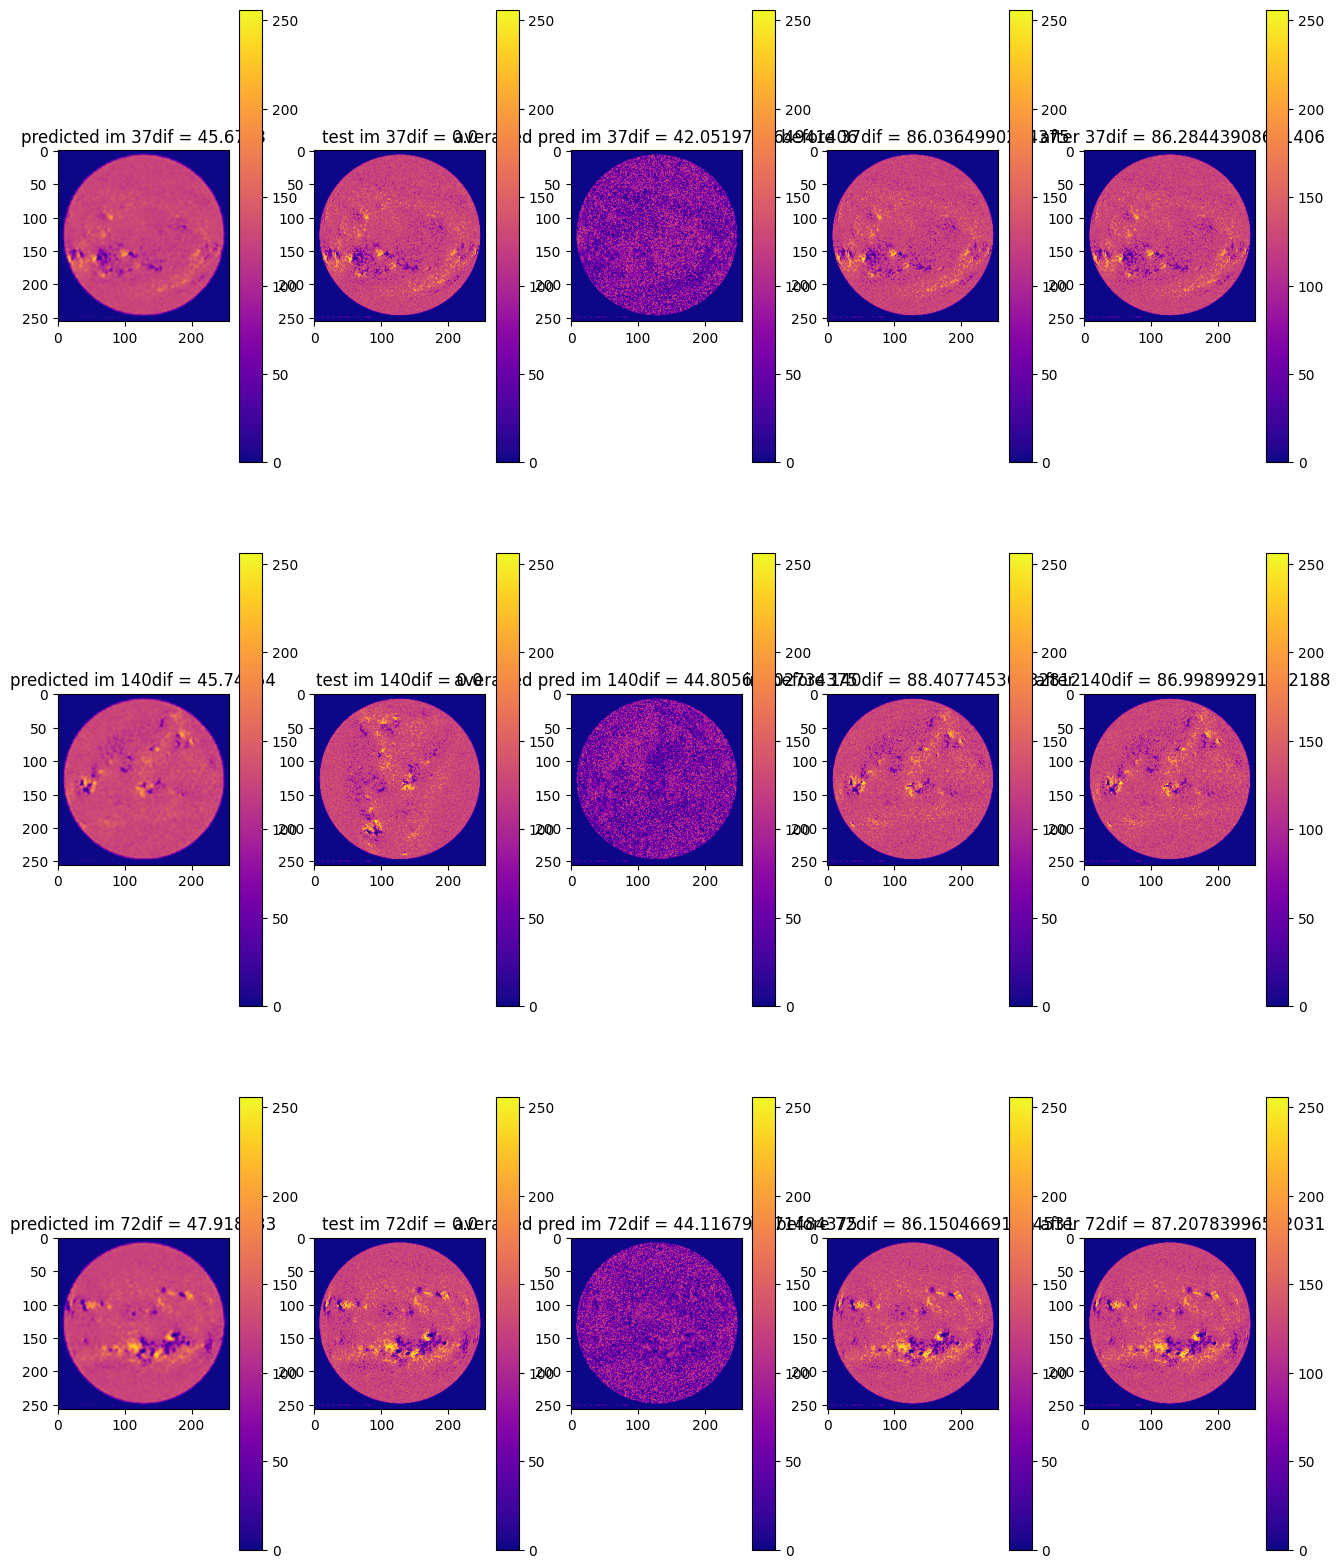

In [118]:
fig, ax = plt.subplots(3, 5, figsize=(16,20))
for i in range(3):
    x = np.random.randint(0,143)
    
    dif = np.mean(np.abs(test_y[x,:,:,0] - new_images[x]))
    im = ax[i,0].imshow(new_images[x], cmap='plasma', vmin=0, vmax=256)
    ax[i,0].set_title('predicted im ' + str(x) + "dif = " + str(dif))
    fig.colorbar(im)
    
    dif = np.mean(np.abs(test_y[x,:,:,0] - test_y[x,:,:,0]))
    im = ax[i,1].imshow(test_y[x,:,:,0], cmap='plasma', vmin=0, vmax=256)
    ax[i,1].set_title('test im ' + str(x) + "dif = " + str(dif))
    fig.colorbar(im)
    
    dif = np.mean(np.abs(test_y[x,:,:,0] - (test_x[x,0,:,:,0]+test_x[x,1,:,:,0])/2))
    im = ax[i,2].imshow((test_x[x,0,:,:,0]+test_x[x,1,:,:,0])/2, cmap='plasma', vmin=0, vmax=256)
    ax[i,2].set_title('averaged pred im ' + str(x) + "dif = " + str(dif))
    fig.colorbar(im)
    
    dif = np.mean(np.abs(test_y[x,:,:,0] - test_x[x,0,:,:,0]))
    im = ax[i,3].imshow(test_x[x,0,:,:,0], cmap='plasma', vmin=0, vmax=256)
    ax[i,3].set_title('im before ' + str(x) + "dif = " + str(dif))
    fig.colorbar(im)
    
    dif = np.mean(np.abs(test_y[x,:,:,0] - test_x[x,1,:,:,0]))
    im = ax[i,4].imshow(test_x[x,0,:,:,0], cmap='plasma', vmin=0, vmax=256)
    ax[i,4].set_title('im after ' + str(x) + "dif = " + str(dif))
    fig.colorbar(im)

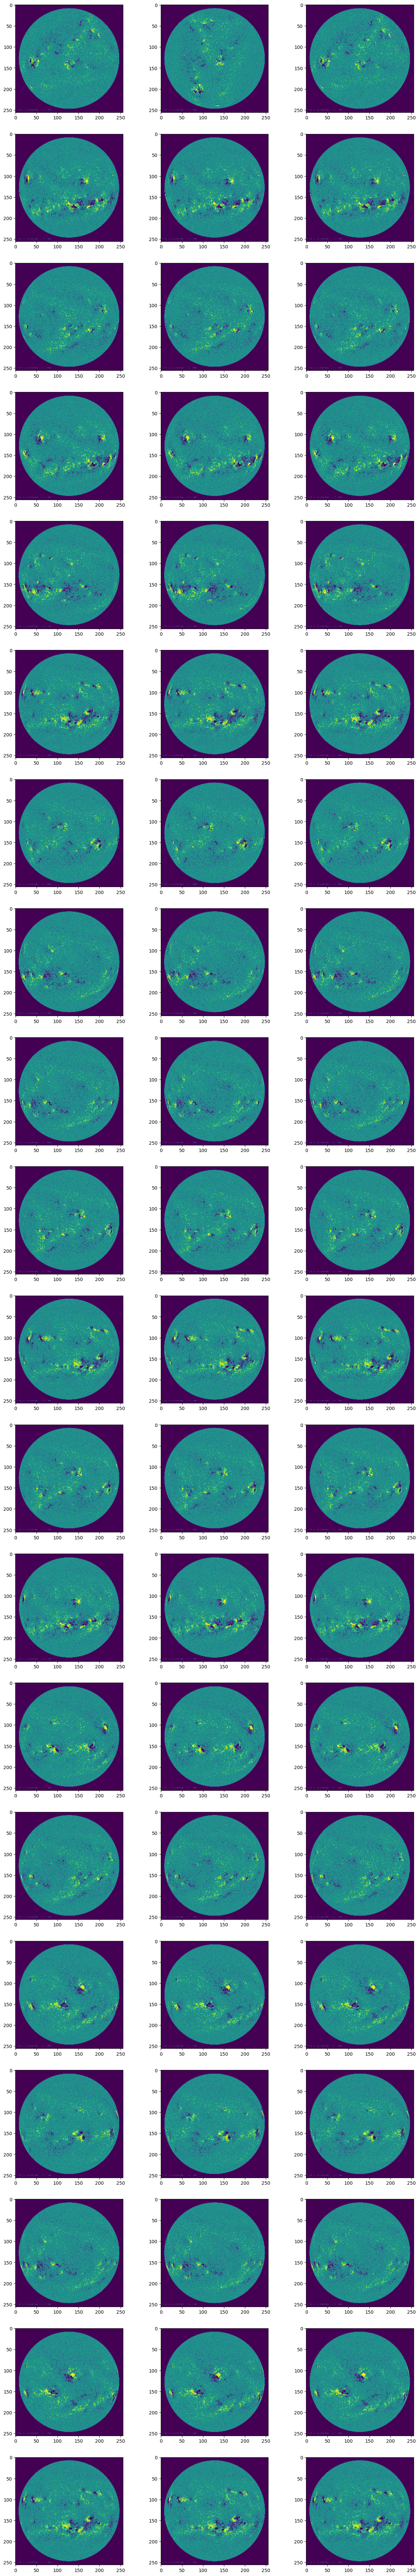

In [137]:
fig, ax = plt.subplots(20,3, figsize=(16,100))
for i in range(120,141):
    ax[120-i,0].imshow(test_x[i,0,:,:,0])
    ax[120-i,1].imshow(test_y[i,:,:,0])
    ax[120-i,2].imshow(test_x[i,0,:,:,0])

In [122]:
testy = np.abs(test_x[0,1,:,:,0] - test_y[0,:,:,0])/2
print(np.mean(testy))
testy = np.abs(new_images[0] - test_y[0,:,:,0])
print(np.mean(testy))

43.06910705566406
45.670265
